This is an example of an end-to-end machine learning project. In this notebook, I will present how to tackle a typical machine learning problem and the ways / tools you can use to solve it.

In this example, I will use the dataset used in the challenge "Meilleur data scientist de France" (the best data scientist in France). It is a regression problem where the goal is to predict the price of a drug before its introdcution to the market based on multiple features (for example, the substances the drug contains).
You can find more information here : https://www.datascience.net/fr/challenge/25/details

This project aims to introduce to ML beginners the following subject:
    - how to work a regression predictive problem end-to-end
    - how to transform data in order to improve model performance
    - how to tune ML algorithms to also improve performance

### 1. Prepare your problem

#### a. Load librairies

Here we load all python modules, classes and functions that we intend to use

In [1]:
import numpy as np
from matplotlib import pyplot
import pandas as pd
import re

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.pipeline import Pipeline

from sklearn.metrics import make_scorer

from sklearn.preprocessing import LabelEncoder

from pickle import dump

#### b. Load dataset

We load our dataset from CSV

In [2]:
dataset = pd.read_csv("data_challenge/boites_medicaments_train.csv", sep = ";")

### 2. Summarize Data

#### a. Descriptive statistics

Let's discover our dataset. We can its shape, type of columns, first N rows...

In [3]:
dataset.shape

(8564, 41)

In [4]:
dataset.count()

libelle              8564
libelle_plaquette    8564
libelle_ampoule      8564
libelle_flacon       8564
libelle_tube         8564
libelle_stylo        8564
libelle_seringue     8564
libelle_pilulier     8564
libelle_sachet       8564
libelle_comprime     8564
libelle_gelule       8564
libelle_film         8564
libelle_poche        8564
libelle_capsule      8564
nb_plaquette         8564
nb_ampoule           8564
nb_flacon            8564
nb_tube              8564
nb_stylo             8564
nb_seringue          8564
nb_pilulier          8564
nb_sachet            8564
nb_comprime          8564
nb_gelule            8564
nb_film              8564
nb_poche             8564
nb_capsule           8564
nb_ml                8564
statut               8564
etat commerc         8564
agrement col         8564
tx rembours          8564
forme pharma         8564
voies admin          8564
statut admin         8564
date declar annee    8564
date amm annee       8564
type proc            8564
titulaires  

In [5]:
dataset.dtypes

libelle               object
libelle_plaquette      int64
libelle_ampoule        int64
libelle_flacon         int64
libelle_tube           int64
libelle_stylo          int64
libelle_seringue       int64
libelle_pilulier       int64
libelle_sachet         int64
libelle_comprime       int64
libelle_gelule         int64
libelle_film           int64
libelle_poche          int64
libelle_capsule        int64
nb_plaquette           int64
nb_ampoule             int64
nb_flacon              int64
nb_tube                int64
nb_stylo               int64
nb_seringue            int64
nb_pilulier            int64
nb_sachet              int64
nb_comprime            int64
nb_gelule              int64
nb_film                int64
nb_poche               int64
nb_capsule             int64
nb_ml                float64
statut                object
etat commerc          object
agrement col          object
tx rembours           object
forme pharma          object
voies admin           object
statut admin  

In [6]:
pd.set_option("display.max_columns", 99) # in order to see all the columns
dataset.head()

,libelle,libelle_plaquette,libelle_ampoule,libelle_flacon,libelle_tube,libelle_stylo,libelle_seringue,libelle_pilulier,libelle_sachet,libelle_comprime,libelle_gelule,libelle_film,libelle_poche,libelle_capsule,nb_plaquette,nb_ampoule,nb_flacon,nb_tube,nb_stylo,nb_seringue,nb_pilulier,nb_sachet,nb_comprime,nb_gelule,nb_film,nb_poche,nb_capsule,nb_ml,statut,etat commerc,agrement col,tx rembours,forme pharma,voies admin,statut admin,date declar annee,date amm annee,type proc,titulaires,substances,prix
0,3 plaquette(s) thermoformée(s) PVC-Aluminium d...,1,0,0,0,0,0,0,0,1,0,0,0,0,3,0,0,0,0,0,0,0,28,0,0,0,0,0.0,Présentation active,Déclaration de commercialisation,oui,65%,comprimé pelliculé,orale,Autorisation active,2014,2014,Procédure décentralisée,MAJORELLE LUXEMBOURG SOPARFI (LUXEMBOURG),DÉSOGESTREL,2.83
1,plaquette(s) thermoformée(s) aluminium de 28 c...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,28,0,0,0,0,0.0,Présentation active,Déclaration de commercialisation,oui,65%,comprimé à croquer,orale,Autorisation active,2013,2009,Procédure de reconnaissance mutuelle,TEVA SANTE,"MONTÉLUKAST ACIDE, MONTÉLUKAST SODIQUE",14.30
2,plaquette(s) thermoformée(s) PVC-aluminium de ...,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0.0,Présentation active,Déclaration de commercialisation,oui,65%,gélule à libération prolongée,orale,Autorisation active,2000,1996,Procédure nationale,MYLAN SAS,CHLORHYDRATE DE DILTIAZEM,5.66
3,30 sachet(s)-dose(s) papier aluminium complexe...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0.0,Présentation active,Déclaration de commercialisation,oui,65%,granulés à libération prolongée,orale,Autorisation active,2005,2004,Procédure nationale,SANOFI AVENTIS FRANCE,"ACIDE VALPROÏQUE, VALPROATE DE SODIUM",24.27
4,plaquette(s) thermoformée(s) PVC-Aluminium de ...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0.0,Présentation active,Déclaration d'arrêt de commercialisation,non,100%,comprimé pelliculé,orale,Autorisation active,2015,2010,Procédure nationale,TEVA SANTE,LÉTROZOLE,59.94


In [7]:
types = dataset.dtypes
num_col = types[types != 'object'].index
binary_col = [ col for col in num_col if 'libelle' in col ]
num_col = num_col.difference(binary_col)
dataset_for_summarize = dataset[num_col]

In [8]:
dataset_for_summarize.describe()

,date amm annee,date declar annee,nb_ampoule,nb_capsule,nb_comprime,nb_film,nb_flacon,nb_gelule,nb_ml,nb_pilulier,nb_plaquette,nb_poche,nb_sachet,nb_seringue,nb_stylo,nb_tube,prix
count,8564.000000,8564.000000,8564.000000,8564.000000,8564.000000,8564.000000,8564.000000,8564.000000,8564.000000,8564.000000,8564.000000,8564.000000,8564.000000,8564.000000,8564.000000,8564.000000,8564.000000
mean,2003.521952,2006.552429,0.088860,0.235638,26.939047,0.002102,0.148412,4.689281,13.955735,0.007940,0.454928,0.050444,0.478748,0.094232,0.003386,0.021952,28.530284
std,8.212770,10.409941,0.890828,3.727437,35.049669,0.050644,0.681787,16.712985,103.283123,0.132995,4.968000,0.970438,4.028671,0.808757,0.093526,0.199226,81.394061
min,1973.000000,1910.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000
25%,1998.000000,2005.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.940000
50%,2006.000000,2010.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.940000
75%,2010.000000,2013.000000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.130000
max,2015.000000,2016.000000,30.000000,120.000000,480.000000,2.000000,25.000000,360.000000,2400.000000,3.000000,140.000000,40.000000,120.000000,28.000000,5.000000,9.000000,990.390000


In [9]:
pd.set_option('precision',2)
dataset_for_summarize.corr(method='pearson')

,date amm annee,date declar annee,nb_ampoule,nb_capsule,nb_comprime,nb_film,nb_flacon,nb_gelule,nb_ml,nb_pilulier,nb_plaquette,nb_poche,nb_sachet,nb_seringue,nb_stylo,nb_tube,prix
date amm annee,1.00e+00,6.46e-01,-1.04e-01,-5.88e-02,2.07e-01,2.42e-03,-1.34e-01,-2.03e-03,-7.40e-02,5.15e-02,7.34e-02,-4.07e-02,-2.71e-02,-3.39e-02,6.36e-03,-7.97e-02,6.49e-02
date declar annee,6.46e-01,1.00e+00,-1.42e-01,-2.00e-02,1.92e-01,-1.82e-02,-1.09e-01,3.08e-02,-7.09e-02,3.41e-02,3.86e-02,-2.67e-02,-2.76e-02,-2.05e-02,-2.42e-04,-7.40e-02,4.91e-02
nb_ampoule,-1.04e-01,-1.42e-01,1.00e+00,-6.31e-03,-7.67e-02,-4.14e-03,2.42e-02,-2.80e-02,-9.67e-03,-5.96e-03,-9.14e-03,-5.19e-03,-1.19e-02,-8.71e-03,-3.61e-03,-1.10e-02,-9.02e-03
nb_capsule,-5.88e-02,-2.00e-02,-6.31e-03,1.00e+00,-4.86e-02,3.45e-02,-5.95e-03,-1.77e-02,-8.54e-03,-3.77e-03,-5.41e-03,-3.29e-03,-7.51e-03,-7.37e-03,-2.29e-03,-6.97e-03,7.88e-02
nb_comprime,2.07e-01,1.92e-01,-7.67e-02,-4.86e-02,1.00e+00,-3.19e-02,-1.50e-01,-2.16e-01,-1.04e-01,5.44e-03,-6.39e-02,-4.00e-02,-9.06e-02,-8.96e-02,-2.78e-02,-7.14e-02,-1.23e-02
nb_film,2.42e-03,-1.82e-02,-4.14e-03,3.45e-02,-3.19e-02,1.00e+00,-9.04e-03,-1.16e-02,-5.61e-03,-2.48e-03,-3.80e-03,-2.16e-03,5.35e-02,-4.84e-03,-1.50e-03,-4.57e-03,7.51e-03
nb_flacon,-1.34e-01,-1.09e-01,2.42e-02,-5.95e-03,-1.50e-01,-9.04e-03,1.00e+00,-3.54e-02,5.95e-02,-1.30e-02,-1.99e-02,-1.11e-02,-2.58e-02,1.10e-01,-7.88e-03,-2.05e-02,9.11e-02
nb_gelule,-2.03e-03,3.08e-02,-2.80e-02,-1.77e-02,-2.16e-01,-1.16e-02,-3.54e-02,1.00e+00,-3.79e-02,-1.68e-02,-2.32e-02,-1.46e-02,-3.33e-02,-3.27e-02,-1.02e-02,-3.09e-02,2.11e-02
nb_ml,-7.40e-02,-7.09e-02,-9.67e-03,-8.54e-03,-1.04e-01,-5.61e-03,5.95e-02,-3.79e-02,1.00e+00,-8.07e-03,-1.24e-02,2.50e-01,-1.50e-02,-1.27e-02,-4.44e-03,-1.26e-02,4.95e-02
nb_pilulier,5.15e-02,3.41e-02,-5.96e-03,-3.77e-03,5.44e-03,-2.48e-03,-1.30e-02,-1.68e-02,-8.07e-03,1.00e+00,-5.47e-03,-3.10e-03,-7.10e-03,-6.96e-03,-2.16e-03,-6.58e-03,2.87e-03


#### b. Data visualizations

We can also use some visualization to see the data distribution or the correlations between variables.

In [10]:
%matplotlib inline 

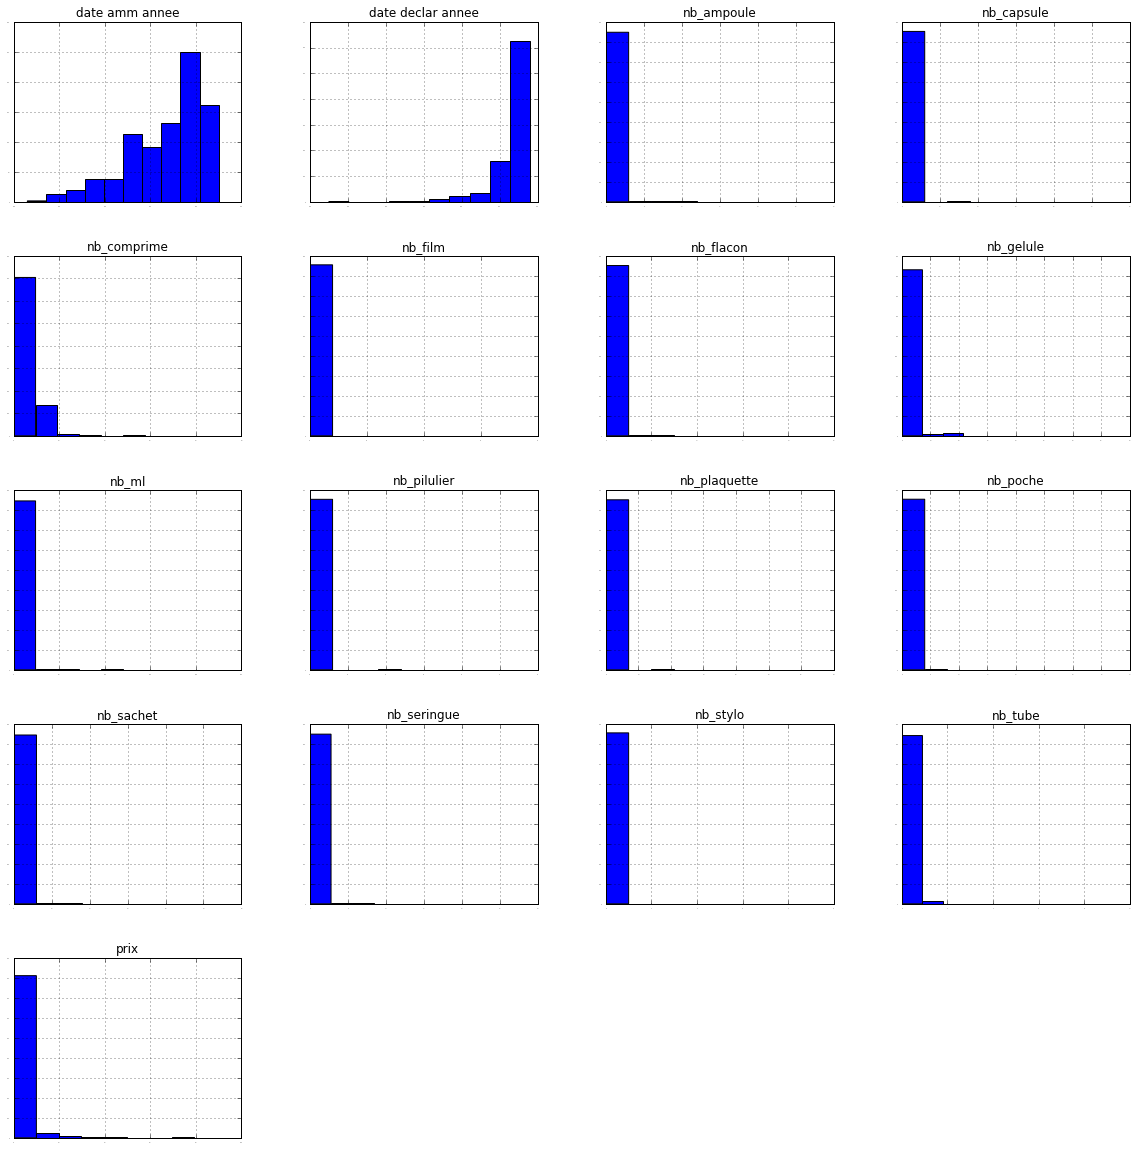

In [11]:
dataset_for_summarize.hist(sharex= False, sharey= False, xlabelsize= 1, ylabelsize = 1, figsize =(20,20))
pyplot.show()

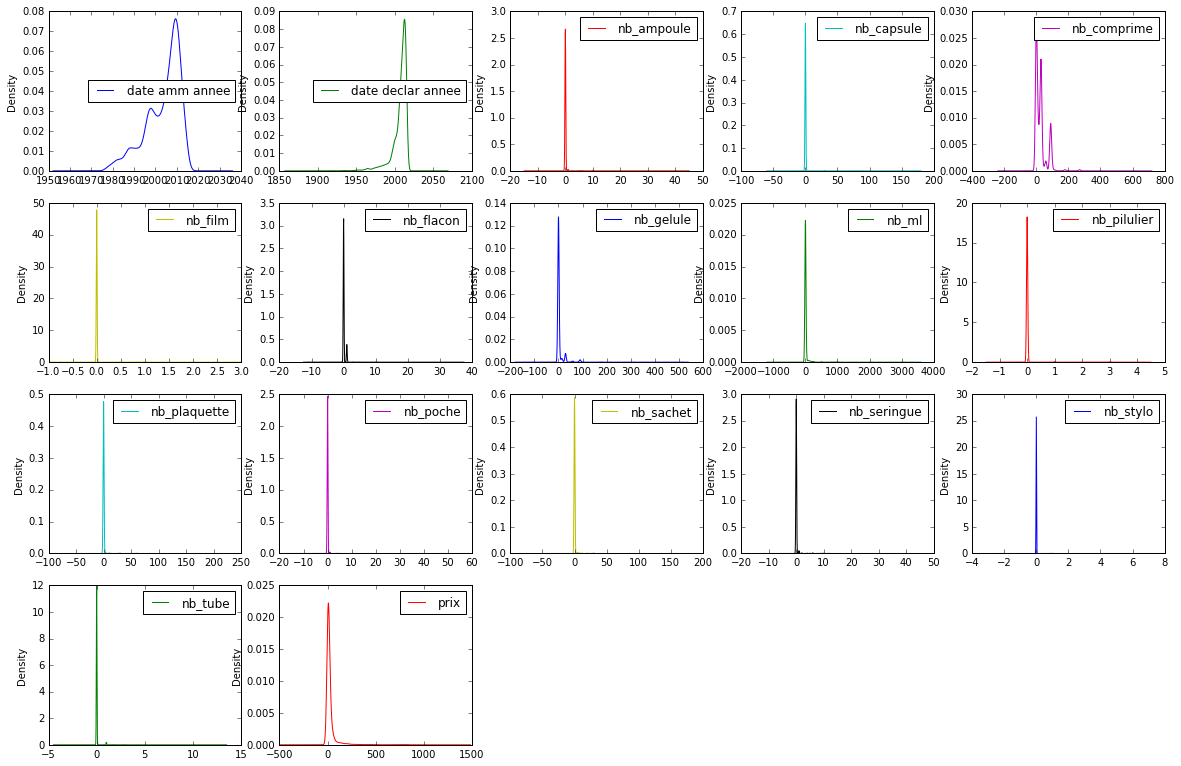

In [12]:
dataset_for_summarize.plot(kind='density', subplots=True, sharex=False, figsize =(20,20), layout = (6,5))
pyplot.show()

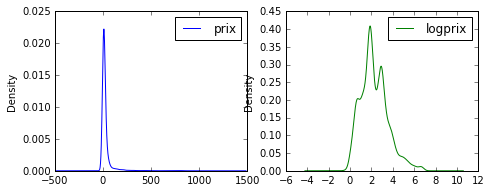

In [13]:
df = dataset_for_summarize[['prix']].copy()
df['logprix'] = np.log(df['prix'])
df.plot(kind='density', subplots=True, sharex=False, figsize =(20,20), layout = (6,5))
pyplot.show()

We can see from the figure above that transforming the price with log gives us a normal distribution which more easy to predict. That's why we will be using log(price) as a target.

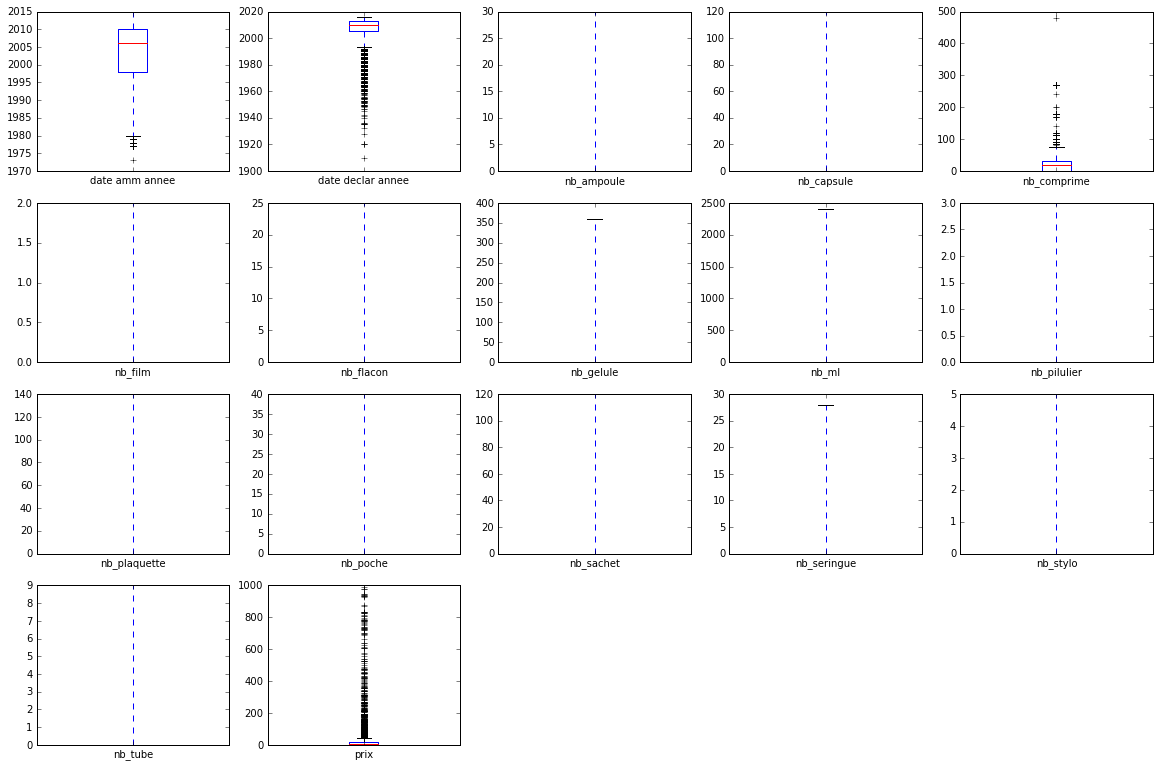

In [14]:
dataset_for_summarize.plot(kind='box', subplots=True,  figsize =(20,20), layout = (6,5), sharex=False, sharey=False)
pyplot.show()

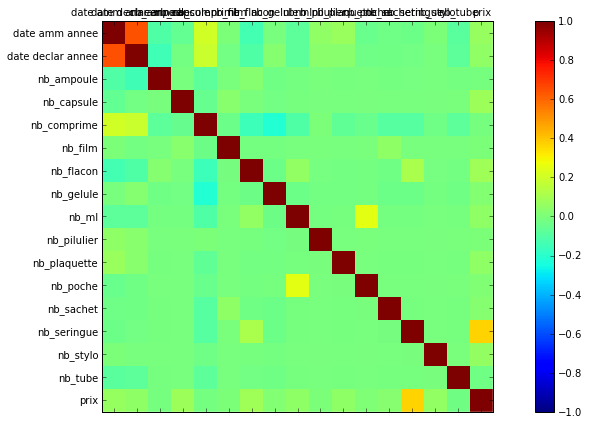

In [15]:
fig = pyplot.figure(figsize =(15,7))
ax = fig.add_subplot(111)
cax = ax.matshow(dataset_for_summarize.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0,dataset_for_summarize.shape[1],1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(dataset_for_summarize.columns)
ax.set_yticklabels(dataset_for_summarize.columns)
pyplot.show()

### 3. Prepare Data

#### a. Data Cleaning

There is no data cleaning as there are no missing values.

#### b. Feature Selection

We will be using all features at first.

#### c. Data Transforms

The goal of the challenge is to predict the price from dataset: boites_medicaments_test.csv
In order to prepare this dataset to transformation prior to prediction, we will append it to boites_medicaments_train.csv at first.

In [16]:
submission_df = pd.read_csv("data_challenge/boites_medicaments_test.csv", sep = ";")

dataset['id'] = 0
submission_df['prix'] = -1

data = pd.concat([dataset, submission_df])

In [17]:
# numerical features
feat_num = ['libelle_plaquette', 'libelle_ampoule', 'libelle_flacon', 
            'libelle_tube', 'libelle_stylo', 'libelle_seringue',
            'libelle_pilulier', 'libelle_sachet', 'libelle_comprime', 
            'libelle_gelule', 'libelle_film', 'libelle_poche',
            'libelle_capsule','nb_plaquette', 'nb_ampoule', 
            'nb_flacon', 'nb_tube', 'nb_stylo', 'nb_seringue',
            'nb_pilulier', 'nb_sachet', 'nb_comprime', 'nb_gelule', 
            'nb_film', 'nb_poche', 'nb_capsule', 'nb_ml']

# dates features
feat_dates = ['date declar annee', 'date amm annee']
# categorical features
feat_cat = ['statut', 'etat commerc', 'agrement col',
          'statut admin', 'type proc','voies admin',
           'substances', 'forme pharma']

# text features : won't be used in this tutorial
feat_text = ['libelle', 'titulaires']

we noticed that 'voies admin' is a multiple value categorical variable seperated with a comma.

In [18]:
len(set(','.join(data['voies admin']).split(',')))

45

same for 'forme pharma' but seperated with "et"

In [19]:
len(set(','.join(data['forme pharma']).split('et')))

278

And also for 'substances'

In [20]:
len(set(','.join(data['substances']).split(',')))

2539

In [21]:
# multiple categorical features
feat_cat_m = [('voies admin',','), ('substances',','), ('forme pharma','et')]

In [22]:
feat_cat = list(set(feat_cat) - set(['voies admin','substances', 'forme pharma']))

This function is used to tranform our dataset into a dataframe X representing our features and a target vector Y.

In [23]:
def Transform_data(data):
    
    df = data.copy()[['id'] + feat_num + feat_dates]
    df['tx rembours'] = data['tx rembours'].apply(lambda x : int(x.replace('%','')))
    
    for cat in feat_cat :
        le = LabelEncoder()
        df[cat] = le.fit_transform(data[cat])   
        
    for cat,sep in feat_cat_m:
        for dim in set(sep.join(data[cat]).split(sep)):
            df[cat + '_' + dim] = data[cat].apply(lambda x : 1 if dim in x else 0)
   
    Y = np.log(data.loc[data['prix'] != -1, 'prix'])
    X = df[df['id'] == 0].drop(['id'], axis=1)
    submission_X = df[df['id'] != 0].drop(['id'], axis=1)    
    
    return X,Y,submission_X

In [24]:
%%time
X,Y,submission_X = Transform_data(data)

Wall time: 23.5 s


In [25]:
X.shape, Y.shape, submission_X.shape

((8564, 2853), (8564,), (3671, 2853))

In [26]:
X.head()

,libelle_plaquette,libelle_ampoule,libelle_flacon,libelle_tube,libelle_stylo,libelle_seringue,libelle_pilulier,libelle_sachet,libelle_comprime,libelle_gelule,libelle_film,libelle_poche,libelle_capsule,nb_plaquette,nb_ampoule,nb_flacon,nb_tube,nb_stylo,nb_seringue,nb_pilulier,nb_sachet,nb_comprime,nb_gelule,nb_film,nb_poche,nb_capsule,nb_ml,date declar annee,date amm annee,tx rembours,statut,agrement col,statut admin,etat commerc,type proc,voies admin_dentaire,voies admin_voie buccale autre,voies admin_périneurale,voies admin_intra-artérielle,voies admin_intraventriculaire cérébrale,voies admin_sous-cutanée,voies admin_intra-articulaire,voies admin_intralésionnelle,voies admin_urétrale,voies admin_périoculaire,voies admin_intraséreuse,voies admin_sublinguale,voies admin_voie extracorporelle autre,voies admin_intra cholangio-pancréatique,...,forme pharma_pansement adhésif(ve),forme pharma_microgranule gastro-résistant(e),forme pharma_comprimé orodispersible sécable,forme pharma_solution à diluer injectable ou pour perfusion,forme pharma_poudre effervescent(e) pour solution buvable,forme pharma_solution pour application moussant(e),forme pharma_comprimé dispersible,forme pharma_ solvant pour suspension injectable,forme pharma_émulsion pour application,forme pharma_ solvant pour solution injectable ou pour perfusion,forme pharma_comprimé pelliculé gastro-résistant(e),forme pharma_ solvant pour préparation injectable,forme pharma_ comprimé,forme pharma_poudre pour suspension ou,forme pharma_ comprimé enrobé enrobé,forme pharma_crème pour application,forme pharma_lotion,forme pharma_suspension buvable,forme pharma_implant injectable,forme pharma_poudre pour solution buvable entéral(e),forme pharma_comprimé enrobé,forme pharma_comprimé pour suspension buvable,forme pharma_solution pour inhalation,forme pharma_comprimé pelliculé sécable à libération prolongée,forme pharma_poudre pour inhalation en gélule,forme pharma_granulés gastro-résistant(e),forme pharma_ dispositif,forme pharma_vernis à ongles médicamenteux(se),forme pharma_collyre en solution,forme pharma_poudre pour aérosol,forme pharma_poudre pour inhalation,forme pharma_poudre effervescent(e) pour suspension buvable,forme pharma_suspension pour inhalation,forme pharma_granules,forme pharma_comprimé dispersible,forme pharma_comprimé pelliculé,forme pharma_suspension injectable à libération prolongée,forme pharma_comprimé effervescent(e) sécable,forme pharma_comprimé à sucer ou à croquer,forme pharma_suppositoire effervescent(e),forme pharma_ granulés effervescent(e),forme pharma_ gélule,forme pharma_granulés pour suspension buvable,forme pharma_ émulsion pour perfusion,forme pharma_poudre pour inhalation,forme pharma_granulés pour solution buvable,forme pharma_comprimé à libération modifiée,forme pharma_microgranule à libération prolongée en gélule,forme pharma_ poudre pour inhalation
0,1,0,0,0,0,0,0,0,1,0,0,0,0,3,0,0,0,0,0,0,0,28,0,0,0,0,0.0,2014,2014,65,1,1,1,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,28,0,0,0,0,0.0,2013,2009,65,1,1,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0.0,2000,1996,65,1,1,1,2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0.0,2005,2004,65,1,1,1,2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0.0,2015,2010,100,1,0,1,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


### 4. Evaluate Algorithms

#### a. Split-out validation dataset

In order to evaluate properly our model, we need to split (horizontally) our (X,Y) into (X_train, Y_train) and (X_validation, Y_validation).

(X_train, Y_train) is used as a training dataset for our model.

(X_validation, Y_validation) is used to evaluate the trained model: we predict Y_prediction using the trained model on X_validation and then we compare it to Y_validation and calculate the error (or the score).

In [27]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

#### b. Test options and evaluation metric

In [28]:
num_folds = 10
seed = 7

##### Mape Score function

The Mape error function is a function calculating this error: |(actual - predicted)/ actual|

In [29]:
# Mean Absolute Percentage Error : |(actual - predicted)/ actual|
#(combined with exp as y = log(price))
def mape_error(y_true, y_pred): 
    return np.mean(np.abs((np.exp(y_true) - np.exp(y_pred)) / np.exp(y_true))) * 100

In [30]:
MAPE = make_scorer(mape_error, greater_is_better = False)

#### c. Spot Check Algorithms

Spot-checking is a way of discovering which algorithms perform well on your machine learning
problem. You cannot know which algorithms are best suited to your problem beforehand. You
must trial a number of methods and focus attention on those that prove themselves the most
promising

StandardScaler : Standardization is a useful technique to transform attributes with a Gaussian distribution and
differing means and standard deviations to a standard Gaussian distribution with a mean of
0 and a standard deviation of 1. It is most suitable for techniques that assume a Gaussian
distribution in the input variables and work better with rescaled data.

Pipeline: Python scikit-learn provides a Pipeline utility to help automate machine learning workflows. Pipelines work by allowing for a linear sequence of data transforms to be chained together culminating in a modeling process that can
be evaluated.

In [31]:
pipelines = []
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
pipelines.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))

Cross validation is an approach that you can use to estimate the performance of a machine
learning algorithm with less variance than a single train-test set split. It works by splitting
the dataset into k-parts (e.g. k = 5 or k = 10). Each split of the data is called a fold. The
algorithm is trained on k-1 folds with one held back and tested on the held back fold. This is
repeated so that each fold of the dataset is given a chance to be the held back test set. After
running cross validation you end up with k different performance scores that you can summarize
using a mean and a standard deviation.

In the following, we perform a cross validation on every model constructed above in order to calculate the score of every model and assess which is/are the best algorithms.

In [32]:
%%time
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring = MAPE)
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) )

ScaledKNN: -51.339328 (1.732839)
ScaledSVR: -48.901100 (2.412779)
ScaledRF: -39.322039 (3.164582)
ScaledET: -37.930812 (4.809733)
ScaledGBM: -65.979096 (3.233717)
Wall time: 32min 20s


#### d. Compare Algorithms

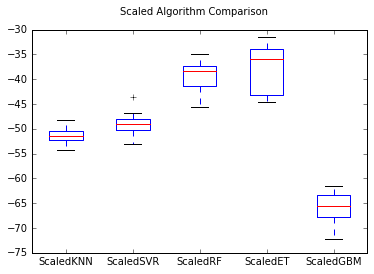

In [33]:
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### 5. Improve Accuracy

This function uses a grid search algorithm to find the best parameters specified in 'params' for a given modem 'my_model'

Grid search is an approach to parameter tuning that will methodically build and evaluate a
model for each combination of algorithm parameters specified in a grid.

In [34]:
def tune_parameters(my_model, params):
    scaler = StandardScaler().fit(X_train)
    rescaledX = scaler.transform(X_train)
    kfold = KFold(n_splits=5, random_state=seed)
    grid = GridSearchCV(estimator=my_model, param_grid=params, scoring=MAPE, cv=kfold)
    grid_result = grid.fit(rescaledX, Y_train)
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

The default number of estimators to perform (n estimators) is 100. This is a good
candidate parameter of Random Forest to tune. Often, the larger the number of trees, the better the performance but the longer the training time.

In [35]:
param_grid = dict(n_estimators=np.array([50,100,200,300,400]))
tune_parameters(RandomForestRegressor(random_state=seed), param_grid)

Best: -38.177376 using {'n_estimators': 400}
-38.593072 (2.566802) with: {'n_estimators': 50}
-38.423046 (2.530874) with: {'n_estimators': 100}
-38.203420 (2.519923) with: {'n_estimators': 200}
-38.182414 (2.519071) with: {'n_estimators': 300}
-38.177376 (2.513803) with: {'n_estimators': 400}


### 6. Finalize Model

#### a. Predictions on validation dataset

In [38]:
model = Pipeline([('Scaler', StandardScaler()),
          ('RF', RandomForestRegressor(n_estimators=200))])

Train our Model on the whole training dataset.

In [39]:
model.fit(X_train, Y_train)

Pipeline(steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('RF', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False))])

Make predictions for X_validation and compare to Y_validation.

In [40]:
predictions = model.predict(X_validation)
print(mape_error(Y_validation, predictions))

33.06075930823207


#### b. Create standalone model on entire training dataset

Train our Model on the entire dataset

In [41]:
model = Pipeline([('Scaler', StandardScaler()),
          ('RF', RandomForestRegressor(n_estimators=200))])

In [42]:
model.fit(X, Y)

Pipeline(steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('RF', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False))])

#### c. Save model for later use

In [43]:
# save the model to disk
filename = 'finalized_model_MDSF.sav'
dump(model, open(filename, 'wb'))

### 7. Submission

In [44]:
predictions =  np.exp(model.predict(submission_X))

In [45]:
pd.DataFrame(predictions, index=submission_df['id']).to_csv('soumission.csv',  
                          header=['prix'],
                          sep = ';')